In [1]:
install.packages("kknn")
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(GGally)
library(kknn)
options(repr.matrix.max.rows = 8)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

In [2]:
url <- "https://raw.githubusercontent.com/RachelX6/DSCI100-Group-Project/main/winequality-white.csv"

In [3]:
wine <- read_delim(url, delim = ";")
wine

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


In [4]:
set.seed(420)
wine_split <- initial_split(wine, prop = .75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

In [5]:
wine_samp_m <- wine_train |>
    group_by(quality) |>
    summarize(across(everything(), list(mean)))
wine_samp_m

quality,fixed acidity_1,volatile acidity_1,citric acid_1,residual sugar_1,chlorides_1,free sulfur dioxide_1,total sulfur dioxide_1,density_1,pH_1,sulphates_1,alcohol_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7.555556,0.3158333,0.3300000,6.758333,0.05544444,57.08333,178.3889,0.9949656,3.178333,0.4855556,10.322222
4,7.187692,0.3764615,0.3113077,4.493077,0.05132308,23.41923,126.6885,0.9943270,3.181077,0.4777692,10.081923
5,6.927126,0.3011183,0.3352957,7.442560,0.05132070,36.69593,152.0850,0.9952982,3.171349,0.4825878,9.823303
6,6.838198,0.2620115,0.3380279,6.462470,0.04514199,35.34223,136.0877,0.9939402,3.187087,0.4914684,10.588238
7,6.731326,0.2581555,0.3266463,5.016082,0.03803811,34.10518,124.8110,0.9923766,3.216814,0.5020274,11.370188
8,6.623741,0.2771583,0.3258993,5.580576,0.03812950,37.52518,126.2734,0.9921375,3.223453,0.4866906,11.676259


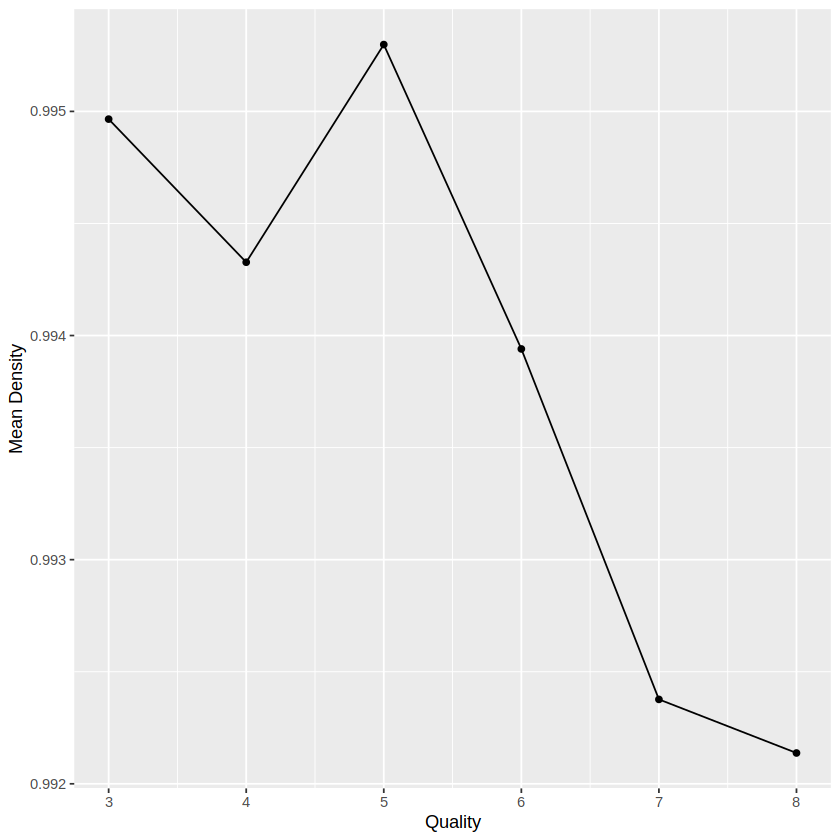

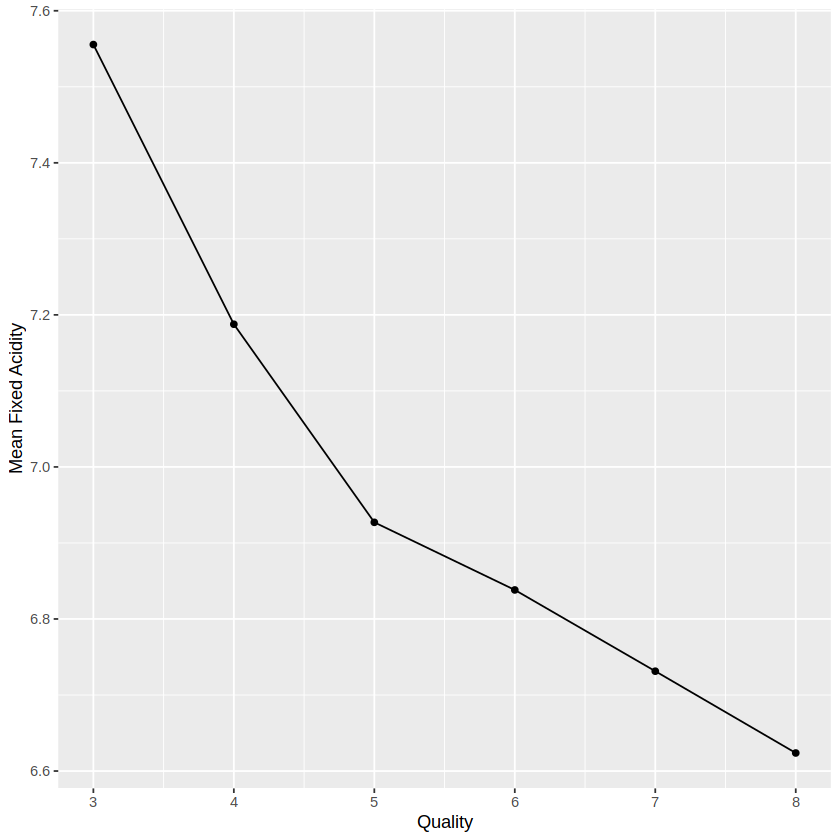

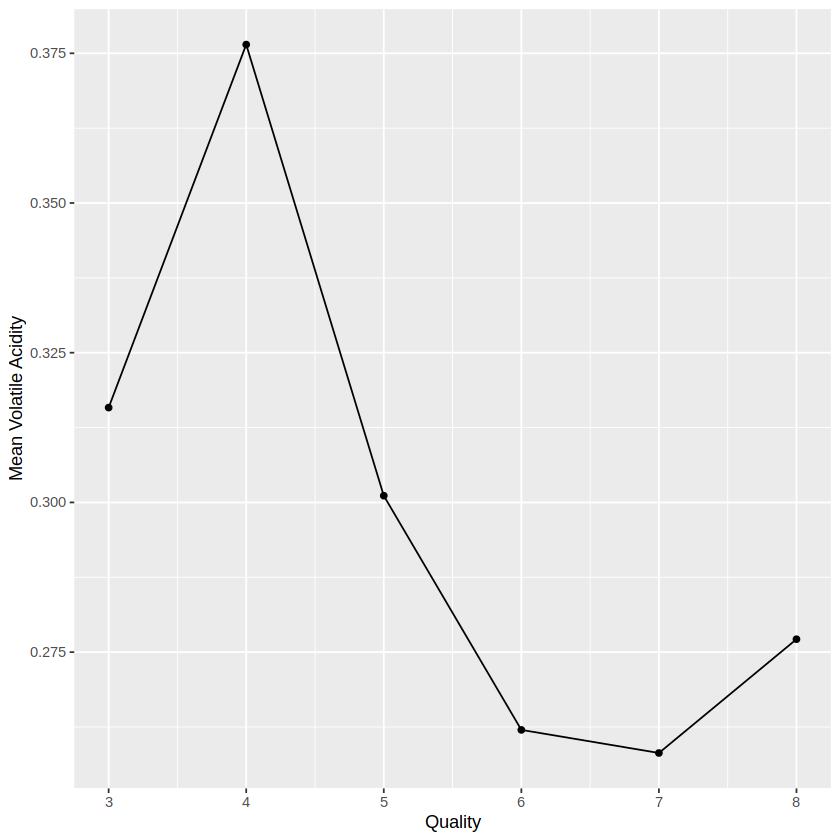

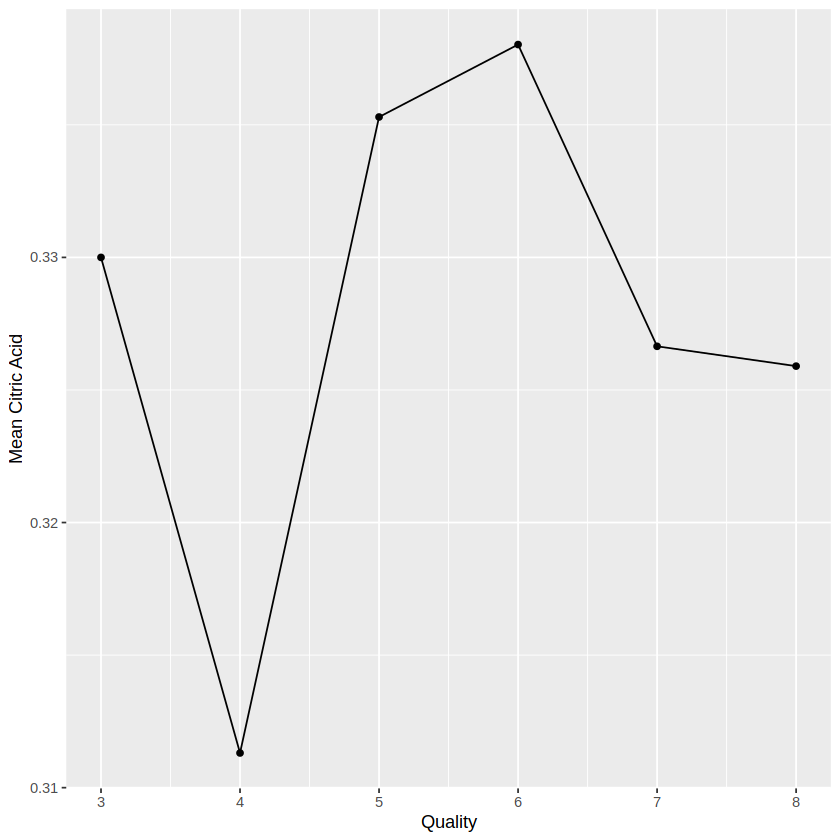

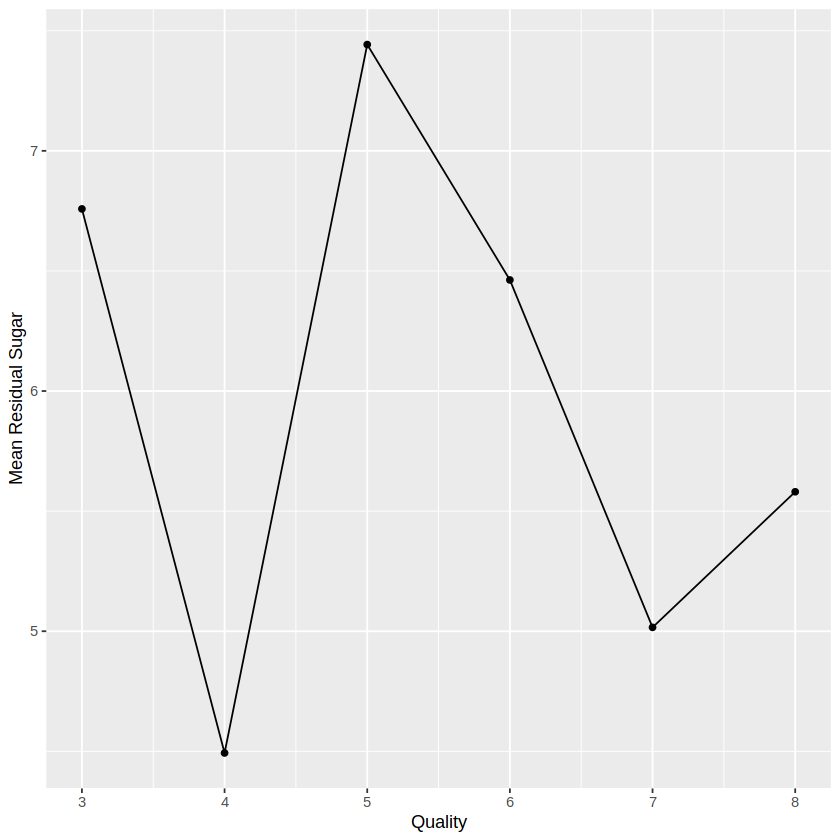

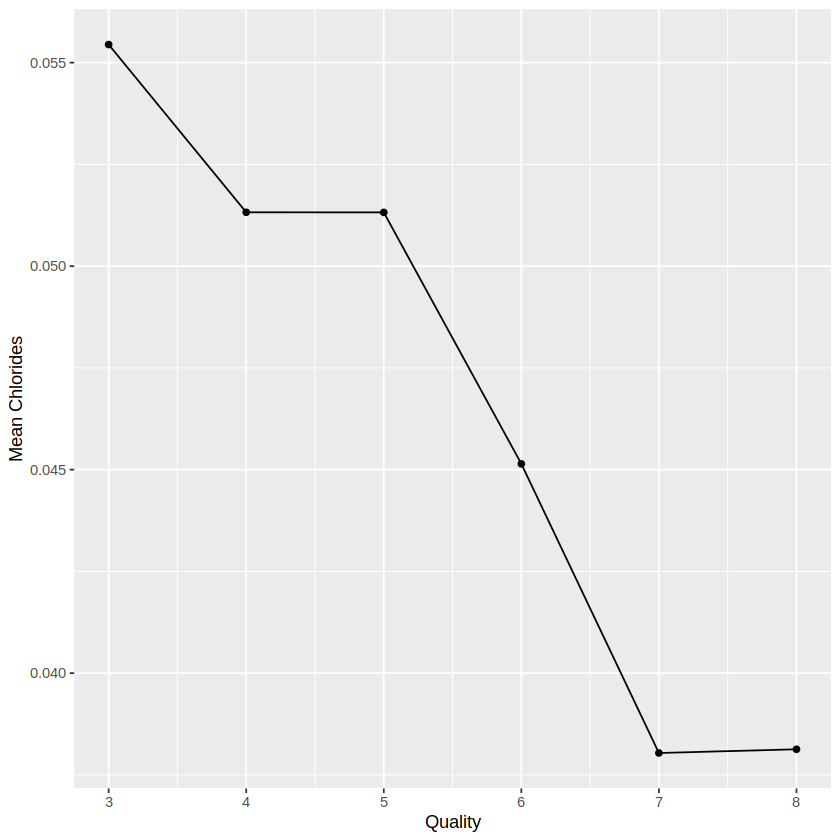

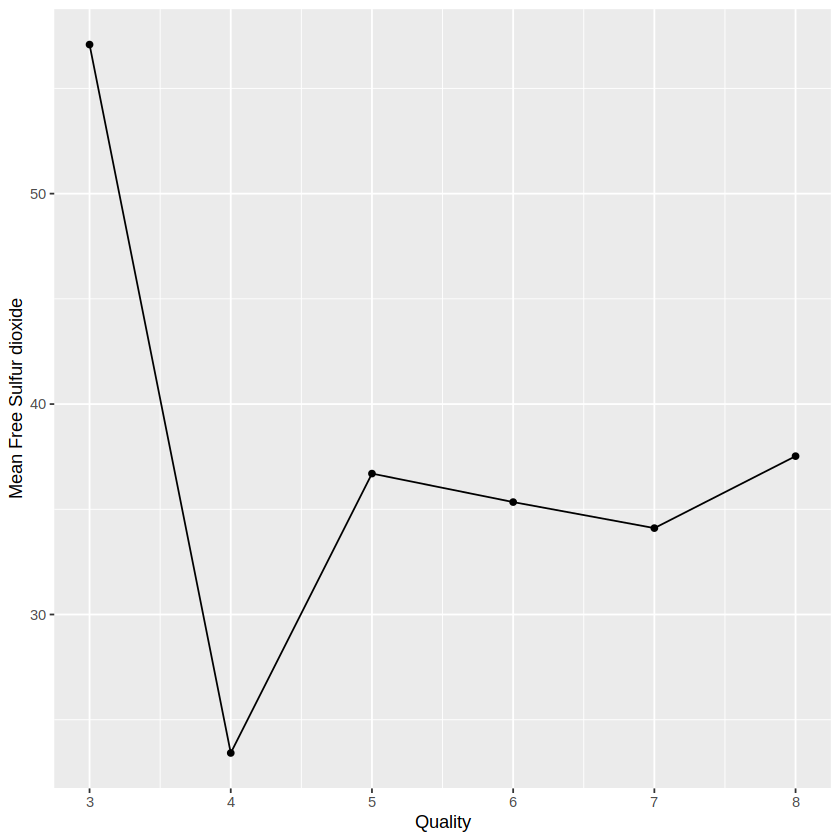

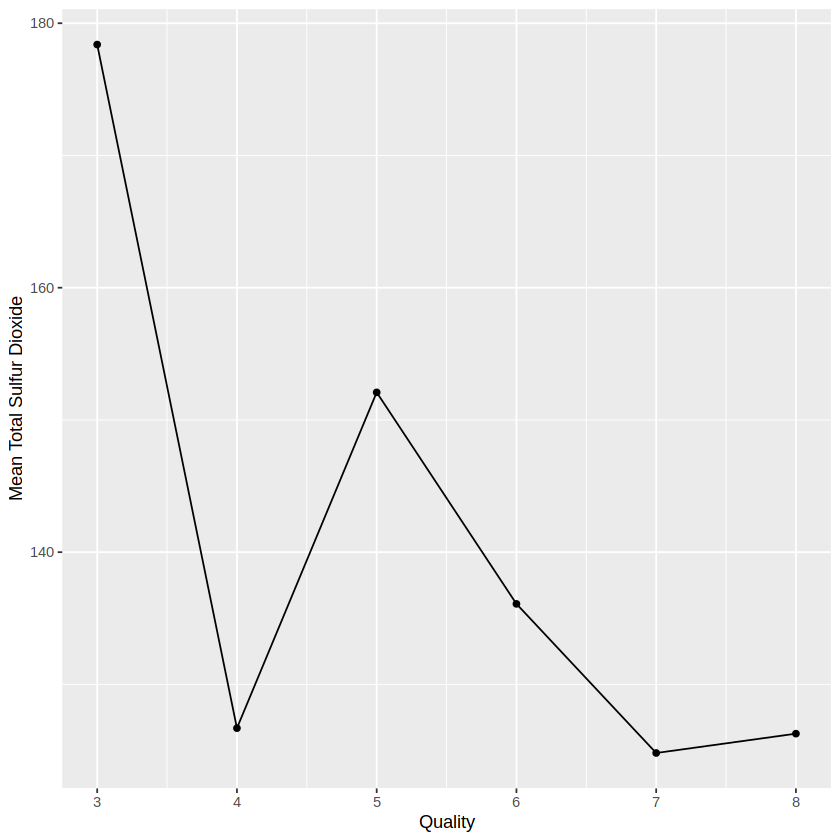

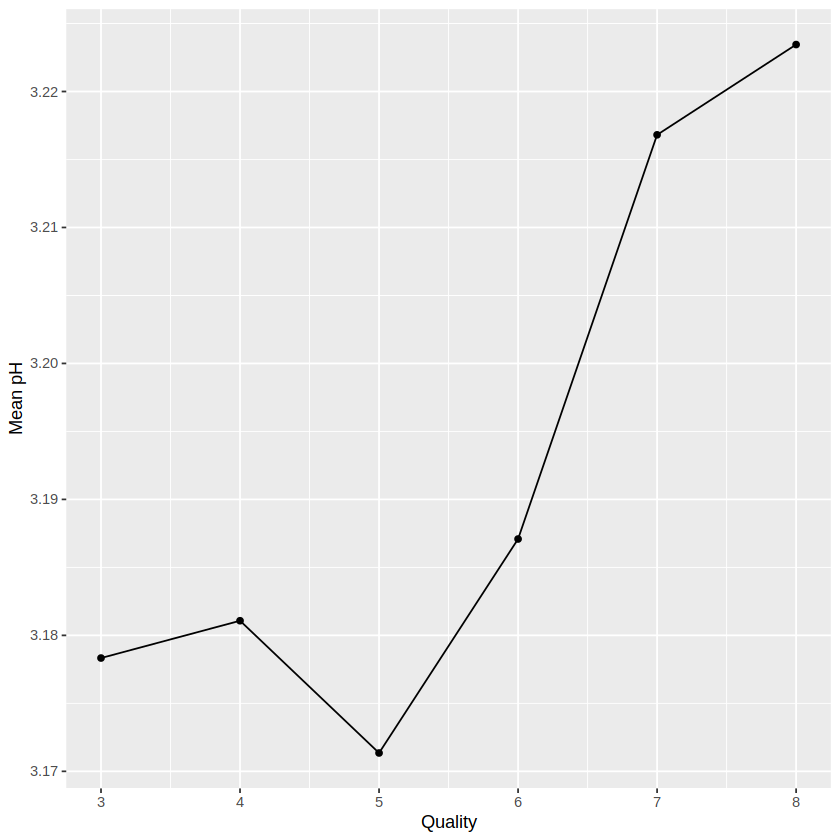

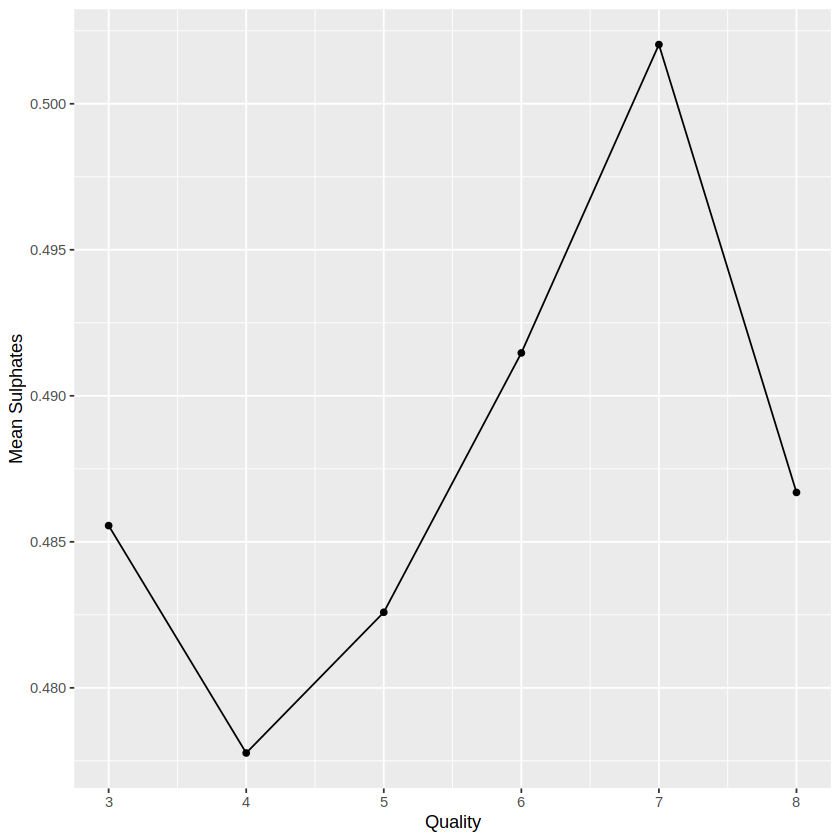

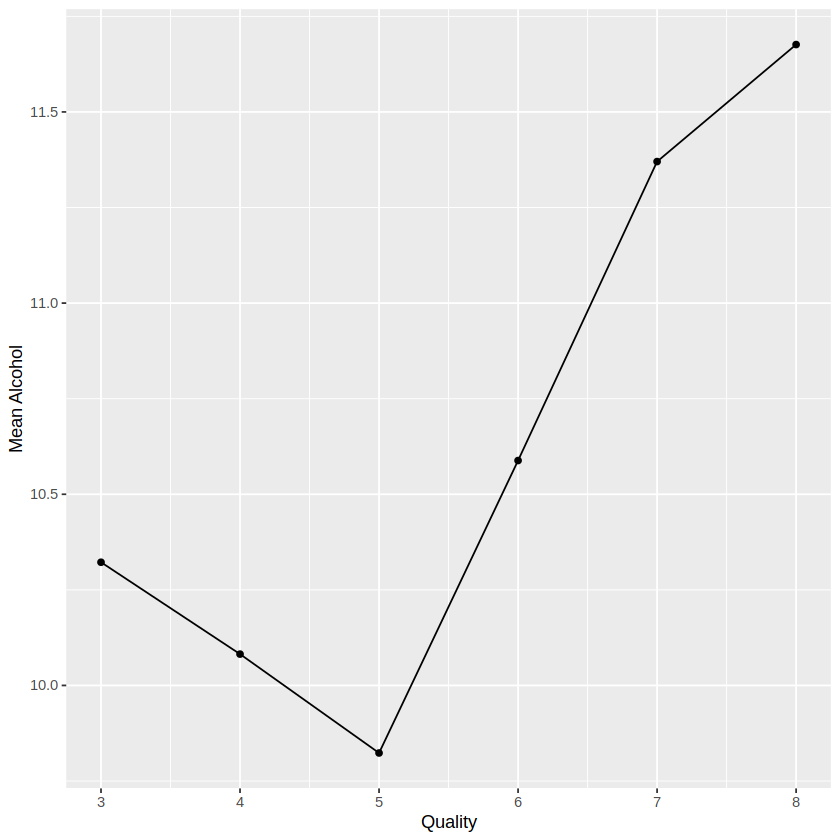

In [6]:
ggplot(wine_samp_m, aes(x= quality, y = density_1)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Density", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `fixed acidity_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Fixed Acidity", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `volatile acidity_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Volatile Acidity", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `citric acid_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Citric Acid", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `residual sugar_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Residual Sugar", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = chlorides_1)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Chlorides", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `free sulfur dioxide_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Free Sulfur dioxide", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = `total sulfur dioxide_1`)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Total Sulfur Dioxide", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = pH_1)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean pH", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = sulphates_1)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Sulphates", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = alcohol_1)) +
    geom_point() +
    geom_line() +
    labs(y = "Mean Alcohol", x = "Quality")


In [6]:
colnames(wine_train) <- c("fixed_acidity", # Adjusting column names for cleanliness.
              "volatile_acidity",
              "citric_acid",
              "residual_sugar",
              "chlorides",
              "free_sulfur_dioxide",
              "total_sulfur_dioxide",
              "density",
              "pH",
              "sulphates",
              "alcohol",
              "quality")
wine_train <- wine_train |>
    mutate(quality = as_factor(quality))
names <- colnames(wine_train |> select(-quality))

In [7]:
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        wine_recipe <- recipe(as.formula(model_string), 
                                data = wine_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(wine_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = wine_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ density,0.4250168
2,quality ~ density+alcohol,0.5221899
3,quality ~ density+alcohol+fixed_acidity,0.5630341
4,quality ~ density+alcohol+fixed_acidity+residual_sugar,0.5600361
⋮,⋮,⋮
8,quality ~ density+alcohol+fixed_acidity+residual_sugar+volatile_acidity+citric_acid+pH+sulphates,0.6016918
9,quality ~ density+alcohol+fixed_acidity+residual_sugar+volatile_acidity+citric_acid+pH+sulphates+free_sulfur_dioxide,0.6035829
10,quality ~ density+alcohol+fixed_acidity+residual_sugar+volatile_acidity+citric_acid+pH+sulphates+free_sulfur_dioxide+chlorides,0.6038557
11,quality ~ density+alcohol+fixed_acidity+residual_sugar+volatile_acidity+citric_acid+pH+sulphates+free_sulfur_dioxide+chlorides+total_sulfur_dioxide,0.6033189


In [8]:
print(accuracies)

# A tibble: 11 × 3
    size model_string                                                   accuracy
   <int> <chr>                                                             <dbl>
 1     1 quality ~ density                                                 0.425
 2     2 quality ~ density+alcohol                                         0.522
 3     3 quality ~ density+alcohol+fixed_acidity                           0.563
 4     4 quality ~ density+alcohol+fixed_acidity+residual_sugar            0.560
 5     5 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.572
 6     6 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.586
 7     7 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.595
 8     8 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.602
 9     9 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.604
10    10 quality ~ density+alcohol+fixed_acidity+residual_sugar+volati…    0.604
11    11 